In [1]:
import numpy as np
import fitp1d.model
import fitp1d.likelihood
import fitp1d.plotting

In [2]:
direc = "/Users/nk452/repos/data/DESI-Analysis/fujilupe/data/v0.1/fft-compare/qmle/dla15-tobepublished"

fname_qmle = f"{direc}/desi-edrp-lyasb1subt-p1d-summary-results.txt"
fname_cov_offdiasyst = f"{direc}/desi-edrp-lyasb1subt-cov-total-offdiag-results.txt"
cov = np.loadtxt(fname_cov_offdiasyst)

# Stat only

In [3]:
cov_stat = np.loadtxt(f"{direc}/desi-edrp-lya-cov-stat.txt") + np.loadtxt(f"{direc}/desi-edrp-sb1-cov-stat.txt")

fpl = fitp1d.likelihood.P1DLikelihood(
    fname_qmle, use_simple_lya_model=True,
    cov=cov_stat,
)

Chi2 / dof= 99.8 / 23
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 99.83                      │              Nfcn = 197              │
│ EDM = 7.6e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬

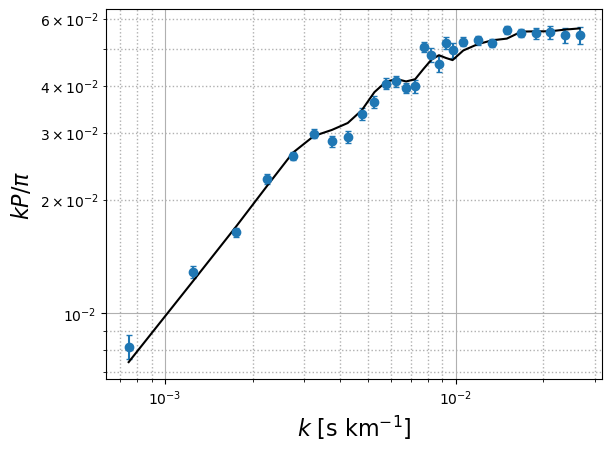

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 781.87it/s]


Auto correlations: [53.15205352 58.27666845 56.18680124 54.48882726 55.16226576]
Removed no burn in


In [4]:
fpl.fitDataBin(2.6, print_info=True)
fitp1d.plotting.plotFitNData(fpl)
samples_statonly = fpl.sample("Stat. only", nsamples=10000)

# Marginalized

In [5]:
fpl = fitp1d.likelihood.P1DLikelihood(
    fname_qmle, use_simple_lya_model=True,
    fname_cov=fname_cov_offdiasyst,
)

# fpl.p1dmodel.setFiducialCorrectionModel(*fitp1d.model.PDW_FIT_PARAMETERS)

Chi2 / dof= 83.1 / 23
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 83.05                      │              Nfcn = 185              │
│ EDM = 2.35e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬

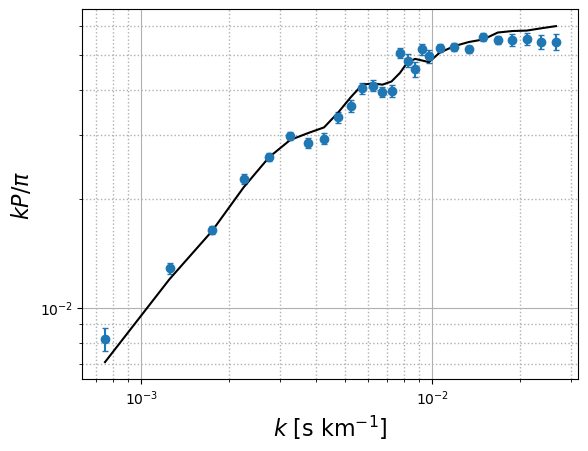

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 783.07it/s]


Auto correlations: [57.76311907 58.5925384  59.07135549 54.47398976 52.6346195 ]
Removed no burn in


In [6]:
fpl.fitDataBin(2.6, print_info=True)
fitp1d.plotting.plotFitNData(fpl)
samples_marg = fpl.sample("Total covariance", nsamples=10000)

# fitp1d.plotting.plotCornerSamples(samples)

# Pull

In [7]:
fname_detailed = f"{direc}/desi-edrp-lyasb1subt-p1d-detailed-results.txt"
cov_stat = np.loadtxt(f"{direc}/desi-edrp-lya-cov-stat.txt") + np.loadtxt(f"{direc}/desi-edrp-sb1-cov-stat.txt")

fpl = fitp1d.likelihood.P1DLikelihood(
    fname_detailed, use_simple_lya_model=True,
    cov=cov_stat,
)

Chi2 / dof= 83.1 / 19
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 83.05                      │              Nfcn = 501              │
│ EDM = 0.000111 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────

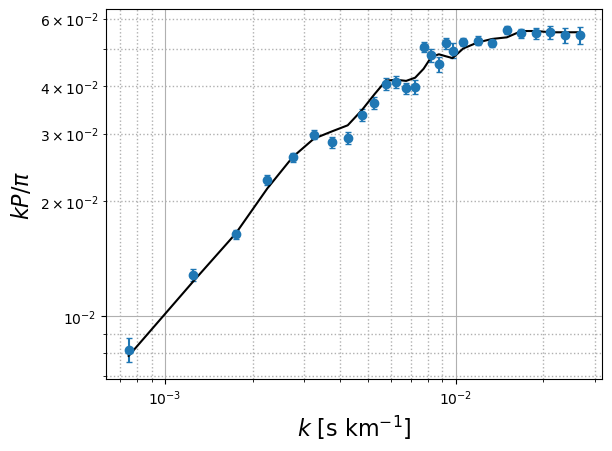

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:15<00:00, 643.66it/s]


Auto correlations: [ 94.96056648  98.27205877  96.09934906 108.90384584 101.4677715
 101.0773444   98.45239278 100.94219225 108.25400473]
Removed no burn in


In [8]:
fpl.fitDataBin(2.6, print_info=True)
fitp1d.plotting.plotFitNData(fpl)
samples_pull = fpl.sample("Fit systematics", nsamples=10000)

# fitp1d.plotting.plotCornerSamples(samples_pull)

# Combined plot

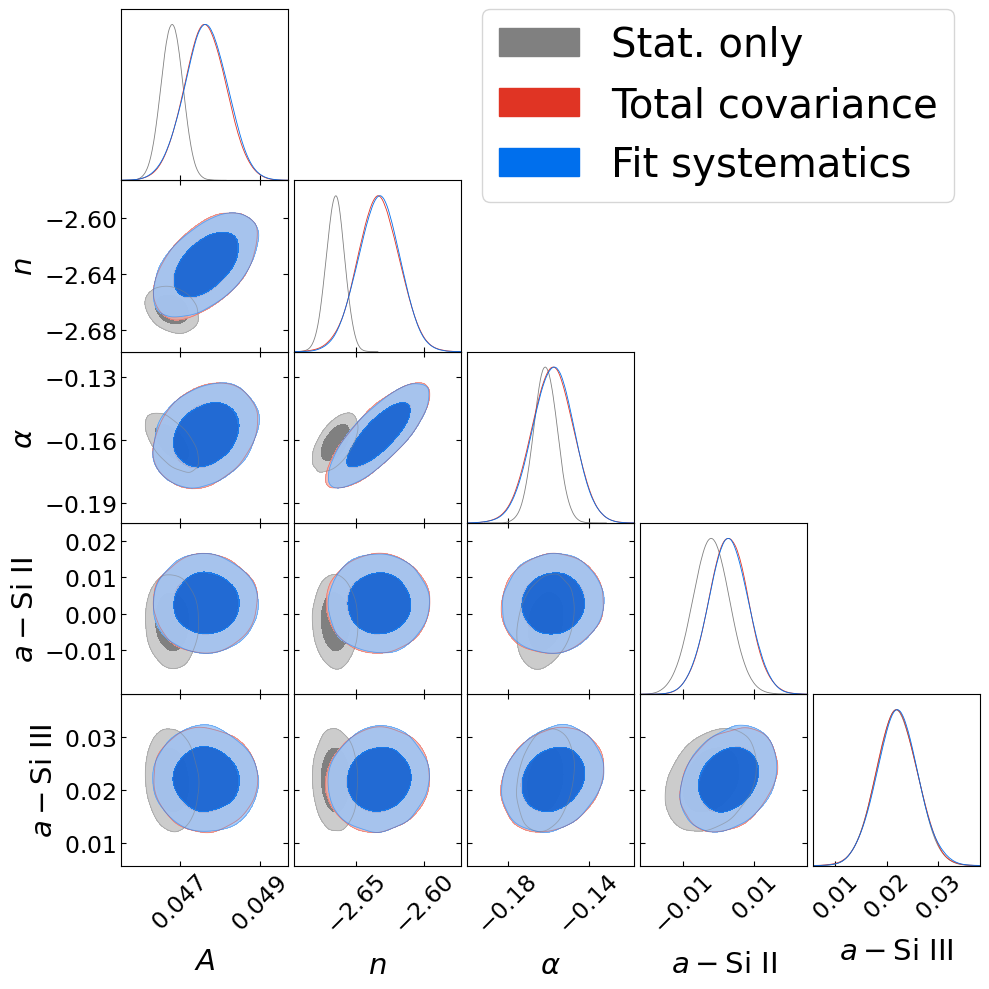

In [9]:
fitp1d.plotting.plotCornerSamples([samples_statonly, samples_marg, samples_pull])